In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import blimpy as bl 
import glob
import os
%matplotlib inline

In [92]:
### EXCLUDE 'OFF' EVENTS FROM THESE CADENCE IDS:
# -- 1549
# -- 6762
# -- 1281
# -- 6363

In [2]:
df0 = pd.read_csv('/datax/scratch/benjb/bl_nearby_stars/star_cadences_5.1_catalog.csv')
d1 = df0.iloc[np.where((df0['Target'].values == 'GJ15A') & (df0['Receiver'].values == 'Rcvr1_2'))[0]]
#for i in d1['.h5 path'].values:
#    if ('GJ15A' in i):
#        print(i)
df0

,Unnamed: 0,Target,Distance,Cadence ID,.h5 path,.dat path,Receiver
0,0,GJ1002,4.69,12847,/datag/pipeline/AGBT16B_999_82/collate/spliced...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr4_6
1,1,GJ1002,4.69,12847,/datag/pipeline/AGBT16B_999_82/collate/spliced...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr4_6
2,2,GJ1002,4.69,12847,/datag/pipeline/AGBT16B_999_82/collate/spliced...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr4_6
3,3,GJ1002,4.69,12847,/datag/pipeline/AGBT16B_999_82/collate/spliced...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr4_6
4,4,GJ1002,4.69,12847,/datag/pipeline/AGBT16B_999_82/collate/spliced...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr4_6
...,...,...,...,...,...,...,...
10237,10237,SO0253,3.85,421558,/datag/pipeline/AGBT23B_999_14/blc76_blp36/blc...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr8_10
10238,10238,SO0253,3.85,421558,/datag/pipeline/AGBT23B_999_14/blc76_blp36/blc...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr8_10
10239,10239,SO0253,3.85,421558,/datag/pipeline/AGBT23B_999_14/blc76_blp36/blc...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr8_10
10240,10240,SO0253,3.85,421558,/datag/pipeline/AGBT23B_999_14/blc76_blp36/blc...,/datax/scratch/benjb/bl_nearby_stars/seticore_...,Rcvr8_10


In [256]:
for i, dat in enumerate(df0['.dat path'].values[::6]):
    if 'OFF' in dat:
        print(df0['Cadence ID'].values[6*i], df0['Receiver'].values[6*i], dat)

1549 Rcvr1_2 /datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57499_12323_GJ388_OFF_0031.gpuspec.0000.dat
6762 Rcvr1_2 /datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57457_48334_GJ699_OFF_0004.gpuspec.0000.dat
1281 Rcvr1_2 /datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57493_77777_HIP19849_OFF_0003.gpuspec.0000.dat
6363 Rcvr1_2 /datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57446_56253_HIP88601_OFF_0016.gpuspec.0000.dat


In [240]:
print(len(df0))

10242


In [246]:
lcadences = np.transpose(np.array([
    df0['Receiver'].values[np.where(df0['Receiver'].values == 'Rcvr1_2')[0]],
    df0['Cadence ID'].values[np.where(df0['Receiver'].values == 'Rcvr1_2')[0]]
], dtype=str))
ulcadences = np.unique(lcadences, axis=0)
print(ulcadences.shape)
scadences = np.transpose(np.array([
    df0['Receiver'].values[np.where(df0['Receiver'].values == 'Rcvr2_3')[0]],
    df0['Cadence ID'].values[np.where(df0['Receiver'].values == 'Rcvr2_3')[0]]
], dtype=str))
uscadences = np.unique(scadences, axis=0)
print(uscadences.shape)
ccadences = np.transpose(np.array([
    df0['Receiver'].values[np.where(df0['Receiver'].values == 'Rcvr4_6')[0]],
    df0['Cadence ID'].values[np.where(df0['Receiver'].values == 'Rcvr4_6')[0]]
], dtype=str))
uccadences = np.unique(ccadences, axis=0)
print(uccadences.shape)
xcadences = np.transpose(np.array([
    df0['Receiver'].values[np.where(df0['Receiver'].values == 'Rcvr8_10')[0]],
    df0['Cadence ID'].values[np.where(df0['Receiver'].values == 'Rcvr8_10')[0]]
], dtype=str))
uxcadences = np.unique(xcadences, axis=0)
print(uxcadences.shape)

(66, 2)
(53, 2)
(62, 2)
(59, 2)


In [239]:
print(len(np.where(df0['Receiver'].values == 'Rcvr1_2')[0])/6)
print(len(np.where(df0['Receiver'].values == 'Rcvr2_3')[0])/6)
print(len(np.where(df0['Receiver'].values == 'Rcvr4_6')[0])/6)
print(len(np.where(df0['Receiver'].values == 'Rcvr8_10')[0])/6)

122.0
59.0
716.0
810.0


In [218]:
h5_list = [
    '/datag/pipeline/AGBT23A_999_37/blc01_blp01/blc01_guppi_60223_03425_GJ15A_0010.rawspec.0000.h5',
    '/datag/pipeline/AGBT23A_999_37/blc02_blp02/blc02_guppi_60223_03425_GJ15A_0010.rawspec.0000.h5',
    '/datag/pipeline/AGBT23A_999_37/blc03_blp03/blc03_guppi_60223_03425_GJ15A_0010.rawspec.0000.h5',
    '/datag/pipeline/AGBT23A_999_37/blc04_blp04/blc04_guppi_60223_03425_GJ15A_0010.rawspec.0000.h5',
    '/datag/pipeline/AGBT23A_999_37/blc05_blp05/blc05_guppi_60223_03425_GJ15A_0010.rawspec.0000.h5',
    '/datag/pipeline/AGBT23A_999_37/blc06_blp06/blc06_guppi_60223_03425_GJ15A_0010.rawspec.0000.h5'
]

for h5 in h5_list:
    fb = bl.Waterfall(h5, load_data=False)
    ghz = fb.header['nchans']*2.7939677238464355e-06/1e3
    print(ghz)

0.1875
0.1875
0.1875
0.1875
0.1875
0.1875


In [94]:
png_list = glob.glob('/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/pngs/*.png')
trimmed_png_list = []
for png in png_list:
    if not 'OFF' in png:
        trimmed_png_list.append(png)
    #else:
    #    print(os.path.basename(png))
print(len(trimmed_png_list), 'png files in trimmed list (no OFFs)')
print(len(png_list), 'png files in full list')
print(len(png_list) - len(trimmed_png_list), 'erroneous OFFs')

2591 png files in trimmed list (no OFFs)
2629 png files in full list
38 erroneous OFFs


In [95]:
csv_list = glob.glob('/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/*_trimmed.csv')
print(csv_list[0])
event_fvec_L = []
event_dvec_L = []
event_svec_L = []
event_fvec_S = []
event_dvec_S = []
event_svec_S = []
event_fvec_C = []
event_dvec_C = []
event_svec_C = []
event_fvec_X = []
event_dvec_X = []
event_svec_X = []

found_png_list = []
print(len(csv_list), 'CSV files')
for csv in csv_list:
    cadence = os.path.basename(csv).split('_')[0]
    if (cadence == '1549') | (cadence == '6762') | (cadence == '1281') | (cadence == '6363'):
        print('Continuing ...')
        continue
    df = pd.read_csv(csv)
    if 'Rcvr1_2' in csv:
        event_fvec_L.append(df['Freq'].values)
        event_dvec_L.append(df['DriftRate'].values)
        event_svec_L.append(df['SNR'].values)
    if 'Rcvr2_3' in csv:
        event_fvec_S.append(df['Freq'].values)
        event_dvec_S.append(df['DriftRate'].values)
        event_svec_S.append(df['SNR'].values)
    if 'Rcvr4_6' in csv:
        event_fvec_C.append(df['Freq'].values)
        event_dvec_C.append(df['DriftRate'].values)
        event_svec_C.append(df['SNR'].values)
    if 'Rcvr8_10' in csv:
        event_fvec_X.append(df['Freq'].values)
        event_dvec_X.append(df['DriftRate'].values)
        event_svec_X.append(df['SNR'].values)
    target = os.path.basename(csv).split('_')[1]
    found_png_list.append([target, len(df['Freq'].values)])
    # for i in range(len(df['Freq'].values)):
    #     f = df['Freq'].values[i]
    #     d = df['DriftRate'].values[i]
    #     target = os.path.basename(csv).split('_')[1]
    #     bandwidth = 2.4 * abs(d)/1e6 * 300*6
    #     bandwidth = np.max((bandwidth, 500./1e6))
    #     f_start = f - (bandwidth/2)
    #     if i != 100:
    #         print(target, f, f_start, str(np.round(f+np.round(d,2)*2342.1052631578946/1000000, 6)), 
    #               str(np.trunc((f+np.round(d,2)*2342.1052631578946/1000000)*1e3)/1e3), str(np.round(d, 2)))
    #         print(csv)
    #     possible_pngs = []
    #     for png in png_list:
    #         if (target in png) & (str(np.trunc((f+np.round(d,2)*2342.1052631578946/1000000)*1e3)/1e3) in png) & (str(np.round(d, 2)) in png):
    #             possible_pngs.append(png)
    #     if len(possible_pngs) > 1: 
    #         print('Error! PNG matching ambiguous.')
    #         continue
    #     if len(possible_pngs) == 0:
    #         print('Error! PNG not found.')
    #         continue
    #     found_png_list.append(possible_pngs[0])
        
event_fvec_L = np.concatenate(event_fvec_L)
event_dvec_L = np.concatenate(event_dvec_L)
event_svec_L = np.concatenate(event_svec_L)
event_fvec_S = np.concatenate(event_fvec_S)
event_dvec_S = np.concatenate(event_dvec_S)
event_svec_S = np.concatenate(event_svec_S)
event_fvec_C = np.concatenate(event_fvec_C)
event_dvec_C = np.concatenate(event_dvec_C)
event_svec_C = np.concatenate(event_svec_C)
event_fvec_X = np.concatenate(event_fvec_X)
event_dvec_X = np.concatenate(event_dvec_X)
event_svec_X = np.concatenate(event_svec_X)
print(len(event_fvec_L), 'L-band events')
print(len(event_fvec_S), 'S-band events')
print(len(event_fvec_C), 'C-band events')
print(len(event_fvec_X), 'X-band events')
print(len(event_fvec_L)+len(event_fvec_S)+len(event_fvec_C)+len(event_fvec_X), 'total events')

/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/3635_GJ1002_Rcvr1_2_splic_f3_trimmed.csv
136 CSV files
Continuing ...
Continuing ...
Continuing ...
Continuing ...
642 L-band events
37 S-band events
1494 C-band events
418 X-band events
2591 total events


In [65]:
found_png_list = np.array(found_png_list)
event_counts = []
for t in np.unique(found_png_list[:,0]):
    all_target_instances = found_png_list[np.where(found_png_list[:,0] == t)[0]]
    count = np.sum(all_target_instances[:,1].astype(int))
    event_counts.append([t, count])

In [66]:
for i in range(len(event_counts)):
    print(event_counts[i])

['GJ1002', 7]
['GJ1111', 1]
['GJ1245AC', 3]
['GJ1245B', 18]
['GJ144', 15]
['GJ15A', 5]
['GJ15B', 1]
['GJ166', 6]
['GJ166BC', 7]
['GJ234', 11]
['GJ244', 5]
['GJ273', 197]
['GJ280', 4]
['GJ380', 21]
['GJ388', 17]
['GJ406', 10]
['GJ411', 12]
['GJ412A', 31]
['GJ412B', 33]
['GJ447', 388]
['GJ473AB', 10]
['GJ54.1', 1]
['GJ628', 7]
['GJ65A', 9]
['GJ687', 14]
['GJ699', 28]
['GJ702A', 42]
['GJ702B', 1029]
['GJ71', 15]
['GJ725', 76]
['GJ820A', 5]
['GJ820B', 7]
['GJ83.1', 2]
['GJ860A', 3]
['GJ860B', 4]
['GJ866', 5]
['GJ873', 4]
['GJ876', 449]
['GJ905', 4]
['HIP19849', 16]
['HIP88601', 91]
['SO0253', 11]


In [49]:
bandwidth = 2.4 * abs(0.76)/1e6 * 300*6
print(bandwidth*1000/2)

1.6416


In [70]:
png_targets = []

for png in png_list:
    t = os.path.basename(png).split('_')[1]
    png_targets.append(t)
u_pngs, counts = np.unique(png_targets, return_counts=True)
png_counts = np.transpose([u_pngs, counts])
for i in range(len(png_counts)):
    print(png_counts[i], event_counts[i][1])

['GJ1002' '7'] 7
['GJ1111' '1'] 1
['GJ1245AC' '3'] 3
['GJ1245B' '18'] 18
['GJ144' '15'] 15
['GJ15A' '5'] 5
['GJ15B' '1'] 1
['GJ166' '6'] 6
['GJ166BC' '7'] 7
['GJ234' '11'] 11
['GJ244' '5'] 5
['GJ273' '197'] 197
['GJ280' '4'] 4
['GJ380' '21'] 21
['GJ388' '17'] 17
['GJ406' '10'] 10
['GJ411' '12'] 12
['GJ412A' '36'] 31
['GJ412B' '33'] 33
['GJ447' '388'] 388
['GJ473AB' '10'] 10
['GJ54.1' '1'] 1
['GJ628' '7'] 7
['GJ65A' '9'] 9
['GJ687' '14'] 14
['GJ699' '28'] 28
['GJ702A' '42'] 42
['GJ702B' '1029'] 1029
['GJ71' '15'] 15
['GJ725' '76'] 76
['GJ820A' '5'] 5
['GJ820B' '7'] 7
['GJ83.1' '2'] 2
['GJ860A' '3'] 3
['GJ860B' '4'] 4
['GJ866' '5'] 5
['GJ873' '4'] 4
['GJ876' '449'] 449
['GJ905' '4'] 4
['HIP19849' '16'] 16
['HIP88601' '91'] 91
['SO0253' '11'] 11


In [89]:
test_csvs = glob.glob('/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/*HIP88601*trimmed.csv')
for i in test_csvs:
    print(i)

/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/20855_HIP88601_Rcvr4_6_splic_f3_trimmed.csv
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/6362_HIP88601_Rcvr1_2_splic_f3_trimmed.csv
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/6363_HIP88601_Rcvr1_2_splic_f3_trimmed.csv


In [91]:
file = '/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc04_guppi_57563_75522_GJ412A_0027.gpuspec.0000.dat'
file2 = '/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc00010203050607_guppi_57563_75522_GJ412A_0027.gpuspec.0000.dat'
dft = df0.iloc[np.where(df0['Cadence ID'].values == 6363)[0]]
for i in range(len(dft)):
    print(dft['.h5 path'].values[i])

/datag/pipeline/AGBT16A_999_65/holding/spliced_blc02030405_2bit_guppi_57446_56253_HIP88601_OFF_0016.gpuspec.0000.h5
/datag/pipeline/AGBT16A_999_65/holding/spliced_blc02030405_2bit_guppi_57446_56579_HIP88601_0017.gpuspec.0000.h5
/datag/pipeline/AGBT16A_999_65/holding/spliced_blc02030405_2bit_guppi_57446_56905_HIP88601_OFF_0018.gpuspec.0000.h5
/datag/pipeline/AGBT16A_999_65/holding/spliced_blc02030405_2bit_guppi_57446_57231_HIP88601_0019.gpuspec.0000.h5
/datag/pipeline/AGBT16A_999_65/holding/spliced_blc02030405_2bit_guppi_57446_57557_HIP88601_OFF_0020.gpuspec.0000.h5
/datag/pipeline/AGBT16A_999_65/holding/spliced_blc02030405_2bit_guppi_57446_57915_HIP93101_0021.gpuspec.0000.h5


In [86]:
test_csvs = glob.glob('/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/*HIP19849*.dat')
for i in test_csvs:
    print(i)

/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc0001020304050607_guppi_57708_21879_HIP19849_0015.gpuspec.0000.dat
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc0001020304050607_guppi_57708_22558_HIP19849_0017.gpuspec.0000.dat
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc0001020304050607_guppi_57708_23238_HIP19849_0019.gpuspec.0000.dat
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57493_77450_HIP19849_0002.gpuspec.0000.dat
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57493_77777_HIP19849_OFF_0003.gpuspec.0000.dat
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57493_78104_HIP19849_0004.gpuspec.0000.dat
/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/spliced_blc02030405_2bit_guppi_57493_78431_HIP19849_OFF_0005.gpuspec.0000.

In [21]:
(1599.451620-1599.4534)/0.00000076

-2342.105263228165

In [32]:
1599.4534 - 0.00000076*2342

1599.45162008

In [22]:
1599.4534-0.00000076*2342

1599.45162008

In [40]:
0.007603/0.00000306

2484.640522875817

In [23]:
1599.4534-0.00178

1599.45162

In [17]:
la = np.transpose([event_fvec_L, event_dvec_L, event_svec_L]).astype(float)
sa = np.transpose([event_fvec_S, event_dvec_S, event_svec_S]).astype(float)
ca = np.transpose([event_fvec_C, event_dvec_C, event_svec_C]).astype(float)
xa = np.transpose([event_fvec_X, event_dvec_X, event_svec_X]).astype(float)
print(la[0])
lu = np.unique(la, axis=0)
print(lu.shape)
su = np.unique(sa, axis=0)
print(su.shape)
cu = np.unique(ca, axis=0)
print(cu.shape)
xu = np.unique(xa, axis=0)
print(xu.shape)

[ 1.5994534e+03 -7.5671300e-01  2.1043835e+01]
(675, 3)
(37, 3)
(1494, 3)
(418, 3)


In [ ]:
print()

In [ ]:
for i in range(len(png_list)):
    png = png_list[i]
    target = 

In [258]:
dats = glob.glob('/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/*.dat')
print(len(dats))
udats = np.unique(dats)
print(len(udats))
lfvec = []
ldvec = []
lsvec = []
sfvec = []
sdvec = []
ssvec = []
cfvec = []
cdvec = []
csvec = []
xfvec = []
xdvec = []
xsvec = []

#semester_counts = []

for dat in udats:
    #print(dat)

    argwhere = np.where(df0['.dat path'].values == dat)[0]
    receiver = df0['Receiver'].values[argwhere][0]
    h5_path = df0['.h5 path'].values[argwhere][0]
    semester = h5_path.split('AGBT')[1][:3]
    cadence = df0['Cadence ID'].values[argwhere][0]

    if (cadence == 1549) | (cadence == 6762) | (cadence == 1281) | (cadence == 6363):
        continue

    df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                    'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                    'Full_number_of_hits'], skiprows=9)
    if receiver == 'Rcvr1_2':
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 1100) & (df['Uncorrected_Frequency'].values < 1200) |
                    (df['Uncorrected_Frequency'].values > 1340) & (df['Uncorrected_Frequency'].values < 1900))[0]
            ]
        f = tdf['freq_start'].values
        d = tdf['Drift_Rate'].values
        s = tdf['SNR'].values
        lfvec.append(f)
        ldvec.append(d)
        lsvec.append(s)
    elif receiver == 'Rcvr2_3':
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 1800) & (df['Uncorrected_Frequency'].values < 2300) |
                    (df['Uncorrected_Frequency'].values > 2360) & (df['Uncorrected_Frequency'].values < 2700))[0]
            ]
        f = tdf['freq_start'].values
        d = tdf['Drift_Rate'].values
        s = tdf['SNR'].values
        sfvec.append(f)
        sdvec.append(d)
        ssvec.append(s)
    elif receiver == 'Rcvr4_6':
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 4000) & (df['Uncorrected_Frequency'].values < 7800))[0]
            ]
        f = tdf['freq_start'].values
        d = tdf['Drift_Rate'].values
        s = tdf['SNR'].values
        cfvec.append(f)
        cdvec.append(d)
        csvec.append(s)
    elif receiver == 'Rcvr8_10':
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 7800) & (df['Uncorrected_Frequency'].values < 11200))[0]
            ]
        f = tdf['freq_start'].values
        d = tdf['Drift_Rate'].values
        s = tdf['SNR'].values
        xfvec.append(f)
        xdvec.append(d)
        xsvec.append(s)
    #fb = bl.Waterfall(h5_path, load_data=False)
    #ghz = fb.header['nchans']*2.7939677238464355e-06/1e3
    #semester_counts.append([semester, receiver, len(f), ghz])

lfvec = np.concatenate(lfvec)
ldvec = np.concatenate(ldvec)
lsvec = np.concatenate(lsvec)
sfvec = np.concatenate(sfvec)
sdvec = np.concatenate(sdvec)
ssvec = np.concatenate(ssvec)
cfvec = np.concatenate(cfvec)
cdvec = np.concatenate(cdvec)
csvec = np.concatenate(csvec)
xfvec = np.concatenate(xfvec)
xdvec = np.concatenate(xdvec)
xsvec = np.concatenate(xsvec)

print(len(lfvec))
print(len(sfvec))
print(len(cfvec))
print(len(xfvec))

10198
10198
1793058
174903
3787619
1636599


In [259]:
print(1793058+174903+3787619+1636599)

7392179


In [222]:
semester_arr = np.array(semester_counts)
print(np.random.choice(semester_arr[:,1], 100))
print(semester_arr[1])

['Rcvr4_6' 'Rcvr2_3' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr8_10'
 'Rcvr8_10' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr1_2' 'Rcvr4_6' 'Rcvr8_10'
 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10'
 'Rcvr8_10' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr2_3' 'Rcvr1_2'
 'Rcvr4_6' 'Rcvr8_10' 'Rcvr1_2' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10'
 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr4_6'
 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr1_2' 'Rcvr8_10'
 'Rcvr8_10' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr4_6'
 'Rcvr8_10' 'Rcvr2_3' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr8_10'
 'Rcvr4_6' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr1_2' 'Rcvr4_6' 'Rcvr8_10'
 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr4_6'
 'Rcvr4_6' 'Rcvr4_6' 'Rcvr4_6' 'Rcvr1_2' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr4_6'
 'Rcvr8_10' 'Rcvr1_2' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr8_10'
 'Rcvr1_2' 'Rcvr4_6' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr8_10' 'Rcvr4_6' 'Rcvr8_10'

In [171]:
u, c = np.unique(semester_arr[:,0], return_counts=True)
for i in range(len(u)):
    print(u[i], c[i])

16A 252
16B 496
17A 30
17B 102
18A 264
18B 2130
19A 1944
19B 882
21A 138
23A 912
23B 2700
24A 348


In [173]:
print(semester_arr[np.where(semester_arr[:,0]=='16A')[0]])

[['16A' 'Rcvr1_2' '3048']
 ['16A' 'Rcvr1_2' '4637']
 ['16A' 'Rcvr1_2' '3829']
 ['16A' 'Rcvr1_2' '7308']
 ['16A' 'Rcvr1_2' '4232']
 ['16A' 'Rcvr1_2' '4101']
 ['16A' 'Rcvr1_2' '3945']
 ['16A' 'Rcvr1_2' '5185']
 ['16A' 'Rcvr1_2' '4233']
 ['16A' 'Rcvr1_2' '4227']
 ['16A' 'Rcvr1_2' '4043']
 ['16A' 'Rcvr1_2' '4142']
 ['16A' 'Rcvr1_2' '4866']
 ['16A' 'Rcvr1_2' '5951']
 ['16A' 'Rcvr1_2' '5335']
 ['16A' 'Rcvr1_2' '4617']
 ['16A' 'Rcvr1_2' '5038']
 ['16A' 'Rcvr1_2' '6290']
 ['16A' 'Rcvr1_2' '5192']
 ['16A' 'Rcvr1_2' '5695']
 ['16A' 'Rcvr1_2' '5444']
 ['16A' 'Rcvr1_2' '6089']
 ['16A' 'Rcvr1_2' '6106']
 ['16A' 'Rcvr1_2' '5392']
 ['16A' 'Rcvr1_2' '4867']
 ['16A' 'Rcvr1_2' '4159']
 ['16A' 'Rcvr1_2' '2625']
 ['16A' 'Rcvr1_2' '2519']
 ['16A' 'Rcvr1_2' '2851']
 ['16A' 'Rcvr1_2' '2528']
 ['16A' 'Rcvr1_2' '4214']
 ['16A' 'Rcvr1_2' '4173']
 ['16A' 'Rcvr1_2' '5097']
 ['16A' 'Rcvr1_2' '5326']
 ['16A' 'Rcvr1_2' '5587']
 ['16A' 'Rcvr1_2' '5064']
 ['16A' 'Rcvr1_2' '3212']
 ['16A' 'Rcvr1_2' '3612']
 ['16A' 'Rcv

In [236]:
print(len(np.where(semester_arr[:,1] == 'Rcvr1_2')[0]))
print(len(np.where(semester_arr[:,1] == 'Rcvr2_3')[0]))
print(len(np.where(semester_arr[:,1] == 'Rcvr4_6')[0]))
print(len(np.where(semester_arr[:,1] == 'Rcvr8_10')[0]))

696
346
4296
4860


In [231]:
ltvec = []
stvec = []
ctvec = []
xtvec = []
atvec = []

for s in np.unique(semester_arr[:,0]):
    print(s)
    li = np.where((semester_arr[:,1] == 'Rcvr1_2') & (semester_arr[:,0] == s))[0]
    si = np.where((semester_arr[:,1] == 'Rcvr2_3') & (semester_arr[:,0] == s))[0]
    ci = np.where((semester_arr[:,1] == 'Rcvr4_6') & (semester_arr[:,0] == s))[0]
    xi = np.where((semester_arr[:,1] == 'Rcvr8_10') & (semester_arr[:,0] == s))[0]
    semester_cut_L = semester_arr[li]
    semester_cut_S = semester_arr[si]
    semester_cut_C = semester_arr[ci]
    semester_cut_X = semester_arr[xi]
    lrfi = np.sum(semester_cut_L[:,2].astype('float')/semester_cut_L[:,3].astype('float'))/(len(li)/12)
    srfi = np.sum(semester_cut_S[:,2].astype('float')/semester_cut_S[:,3].astype('float'))/(len(si)/12)
    crfi = np.sum(semester_cut_C[:,2].astype('float')/semester_cut_C[:,3].astype('float'))/(len(ci)/12)
    xrfi = np.sum(semester_cut_X[:,2].astype('float')/semester_cut_X[:,3].astype('float'))/(len(xi)/12)
    arfi = (np.sum(semester_cut_L[:,2].astype('float'))/0.66+np.sum(semester_cut_S[:,2].astype('float'))/0.84+np.sum(semester_cut_C[:,2].astype('float'))/3.8+np.sum(semester_cut_X[:,2].astype('float'))/3.4)/5/(len(li)+len(si)+len(ci)+len(xi))
    ltvec.append(lrfi)
    stvec.append(srfi)
    ctvec.append(crfi)
    xtvec.append(xrfi)
    atvec.append(arfi)

16A
16B
17A
17B
18A
18B
19A
19B
21A
23A
23B
24A


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [224]:
print(ltvec)
semester_vec = np.array(['16A',
'16B',
'17A',
'17B',
'18A',
'18B',
'19A',
'19B',
'21A',
'23A',
'23B',
'24A'])
snumvec = np.array([16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 21, 23, 23.5, 24])

[959.0444229652499, 655.6509984639016, 1128.6718614718616, nan, nan, nan, nan, nan, nan, 1510.7637606837604, nan, nan]


In [178]:
print(np.isnan(ltvec))

[False False False  True  True  True  True  True  True False  True  True]


In [179]:
ll = np.array(ltvec)[~np.isnan(ltvec)]
print(ll)

[4238.13888889 2957.64285714 5092.25       1416.34102564]


In [ ]:
dfc = pd.read_csv('/home/cgchoza/galaxies/complete_cadences_catalog.csv')
sessions = dfc['Session'].values
semesters = np.array([i[4:7] for i in sessions])
bands = dfc['Band'].values
ch5s = dfc['.h5 path'].values
cdats = dfc['.dat path'].values

print(np.unique(semesters))

['18A' '18B' '19A' '19B' '20A' '20B' '21A' '21B' '22B']


In [210]:
ltvec = []
stvec = []
ctvec = []
xtvec = []
atvec = []

all_semesters = ['16A', '16B', '17A', '17B', '18A', '18B', '19A', '19B', '20A', '20B', '21A', '21B', '22A', '22B', '23A', '23B', '24A']

for s in all_semesters:
    print(s)
    li = np.where((semester_arr[:,1] == 'Rcvr1_2') & (semester_arr[:,0] == s))[0]
    si = np.where((semester_arr[:,1] == 'Rcvr2_3') & (semester_arr[:,0] == s))[0]
    ci = np.where((semester_arr[:,1] == 'Rcvr4_6') & (semester_arr[:,0] == s))[0]
    xi = np.where((semester_arr[:,1] == 'Rcvr8_10') & (semester_arr[:,0] == s))[0]
    cli = np.where((bands == 'L') & (semesters == s))[0]
    csi = np.where((bands == 'S') & (semesters == s))[0]
    cci = np.where((bands == 'C') & (semesters == s))[0]
    cxi = np.where((bands == 'X') & (semesters == s))[0]
    semester_cut_L = semester_arr[li]
    semester_cut_S = semester_arr[si]
    semester_cut_C = semester_arr[ci]
    semester_cut_X = semester_arr[xi]
    clrfi = 0
    clghz = 0
    csrfi = 0
    csghz = 0
    ccrfi = 0
    ccghz = 0
    cxrfi = 0
    cxghz = 0
    for i, dat in enumerate(cdats[cli]):
        df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                        'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                        'Full_number_of_hits'], skiprows=9)
        tdf = df.iloc[
                np.where((df['Uncorrected_Frequency'].values > 1100) & (df['Uncorrected_Frequency'].values < 1200) |
                        (df['Uncorrected_Frequency'].values > 1340) & (df['Uncorrected_Frequency'].values < 1900))[0]
                ]
        f = tdf['freq_start'].values
        clrfi += len(f)
        h5 = ch5s[cli][i]
        fb = bl.Waterfall(h5, load_data=False)
        ghz = fb.header['nchans']*2.7939677238464355e-06/1e3
        clghz += ghz
    for dat in cdats[csi]:
        df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                        'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                        'Full_number_of_hits'], skiprows=9)
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 1800) & (df['Uncorrected_Frequency'].values < 2300) |
                    (df['Uncorrected_Frequency'].values > 2360) & (df['Uncorrected_Frequency'].values < 2700))[0]
            ]
        f = tdf['freq_start'].values
        csrfi += len(f)
    for dat in cdats[cci]:
        df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                        'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                        'Full_number_of_hits'], skiprows=9)
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 4000) & (df['Uncorrected_Frequency'].values < 7800))[0]
            ]
        f = tdf['freq_start'].values
        ccrfi += len(f)
    for dat in cdats[cxi]:
        df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                        'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                        'Full_number_of_hits'], skiprows=9)
        tdf = df.iloc[
            np.where((df['Uncorrected_Frequency'].values > 7800) & (df['Uncorrected_Frequency'].values < 11200))[0]
            ]
        f = tdf['freq_start'].values
        cxrfi += len(f)
    lrfi = (np.sum(semester_cut_L[:,2].astype('float'))+clrfi)/(len(li)*5+len(cli)*5)/0.66 #GHz
    srfi = (np.sum(semester_cut_S[:,2].astype('float'))+csrfi)/(len(si)*5+len(csi)*5)/0.84
    crfi = (np.sum(semester_cut_C[:,2].astype('float'))+ccrfi)/(len(ci)*5+len(cci)*5)/3.8
    xrfi = (np.sum(semester_cut_X[:,2].astype('float'))+cxrfi)/(len(xi)*5+len(cxi)*5)/3.4
    arfi = (np.sum(semester_cut_L[:,2].astype('float'))/0.66+np.sum(semester_cut_S[:,2].astype('float'))/0.84+np.sum(semester_cut_C[:,2].astype('float'))/3.8+np.sum(semester_cut_X[:,2].astype('float'))/3.4)/5/(len(li)+len(si)+len(ci)+len(xi))
    ltvec.append(lrfi)
    stvec.append(srfi)
    ctvec.append(crfi)
    xtvec.append(xrfi)
    atvec.append(arfi)

16A
16B
17A
17B
18A


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


18B
19A
19B
20A


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars


20B
21A
21B
22A
22B
23A
23B
24A


In [226]:
np.save('/datax/scratch/benjb/bl_nearby_stars/seticore_output/semesterly_rfi_arr.npy', semester_arr)

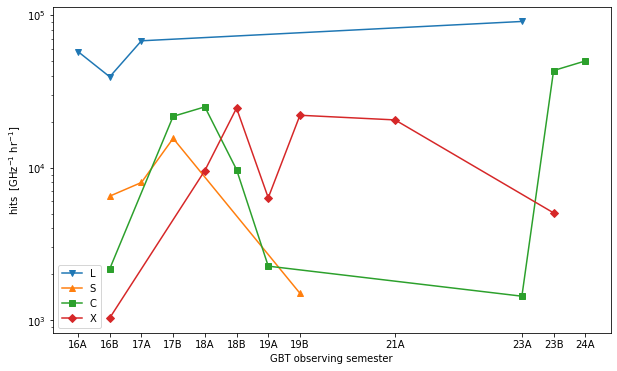

In [234]:
# takes splicing into account incorrectly

#snumvec = np.arange(16, 24.5, 0.5)
#print(snumvec)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.plot(snumvec[~np.isnan(ltvec)], np.array(ltvec)[~np.isnan(ltvec)], marker='v', label='L')
plt.plot(snumvec[~np.isnan(stvec)], np.array(stvec)[~np.isnan(stvec)], marker='^', label='S')
plt.plot(snumvec[~np.isnan(ctvec)], np.array(ctvec)[~np.isnan(ctvec)], marker='s', label='C')
plt.plot(snumvec[~np.isnan(xtvec)], np.array(xtvec)[~np.isnan(xtvec)], marker='D', label='X')
#plt.plot(snumvec, np.array(atvec), c='k', lw=3, marker='o', ms=10, label='all')
plt.yscale('log')
plt.legend()
plt.xticks(ticks=snumvec, labels=semester_vec)
plt.xlabel('GBT observing semester')
plt.ylabel(r'hits  [GHz$^{-1}$ hr$^{-1}$]')
plt.savefig('/datax/scratch/benjb/bl_nearby_stars/seticore_output/plots/RFI_by_semester_5.1_pc_sample.pdf', bbox_inches='tight')
#plt.grid()
plt.show()

In [235]:
print(np.max(np.abs(dvec)))

NameError: name 'dvec' is not defined

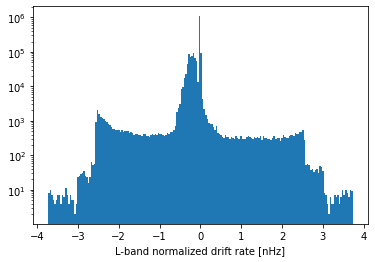

In [29]:
plt.hist(ldvec/(lfvec/1000), bins=200)
plt.yscale('log')
plt.xlabel('L-band normalized drift rate [nHz]')
plt.show()

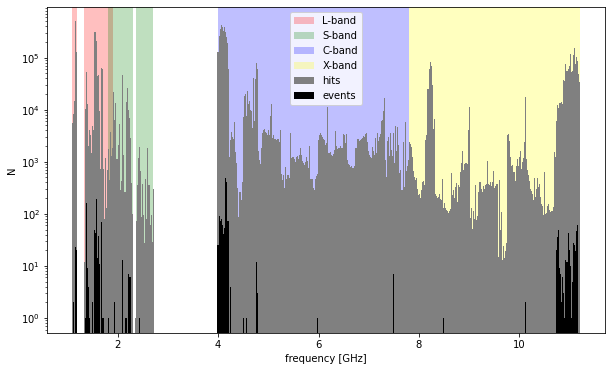

In [139]:
fvec = np.concatenate((lfvec, sfvec, cfvec, xfvec))
event_fvec = np.concatenate((event_fvec_L, event_fvec_S, event_fvec_C, event_fvec_X))

fig = plt.subplots(1, 1, figsize=(10,6))

plt.axvspan(1.1, 1.9, color='red', alpha=0.25, lw=0, label='L-band')
plt.axvspan(1.8, 2.7, color='green', alpha=0.25, lw=0, label='S-band')
plt.axvspan(4.0, 7.8, color='blue', alpha=0.25, lw=0, label='C-band')
plt.axvspan(7.8, 11.2, color='yellow', alpha=0.25, lw=0, label='X-band')
plt.axvspan(1.2, 1.34, color='white', lw=0, alpha=1)
plt.axvspan(2.3, 2.36, color='white', lw=0, alpha=1)

plt.hist(fvec/1000, bins=500, range=(1.1, 11.2), color='gray', label='hits')
plt.hist(event_fvec/1000, bins=500, range=(1.1, 11.2), color='black', label='events')

plt.xlabel('frequency [GHz]')
plt.ylabel('N')
plt.yscale('log')
plt.legend()
plt.savefig('/datax/scratch/benjb/bl_nearby_stars/seticore_output/plots/hit_event_frequency_histogram.pdf', bbox_inches='tight')

plt.show()

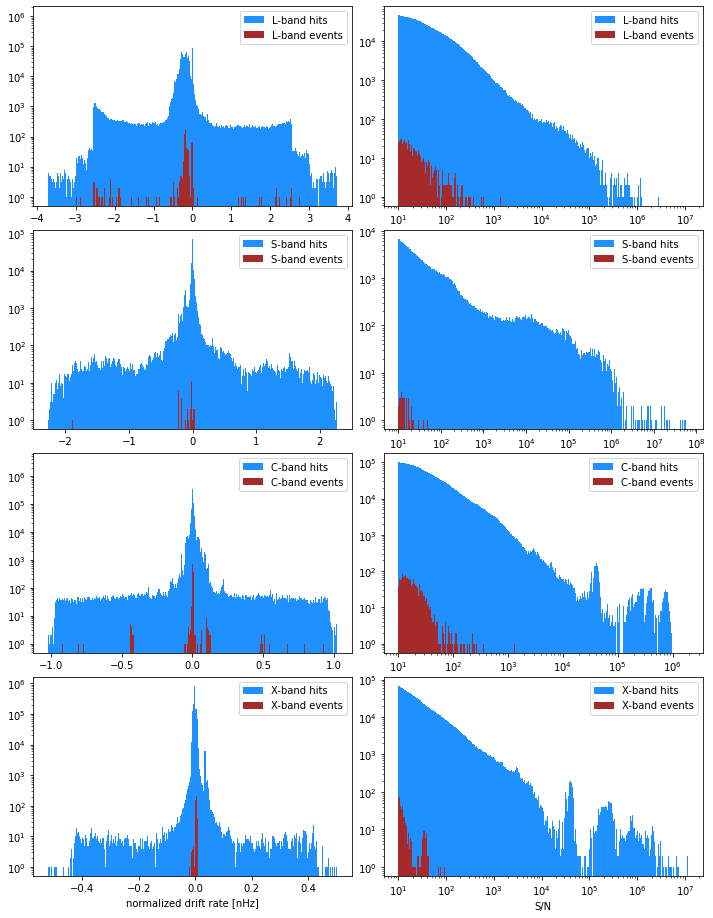

In [141]:
fig, ax = plt.subplots(4, 2, figsize=(12,16))
hit_color = 'dodgerblue'
event_color = 'brown'
nbins = 300

ax[0,0].hist(ldvec/(lfvec/1000), color=hit_color, bins=nbins, label='L-band hits')
ax[1,0].hist(sdvec/(sfvec/1000), color=hit_color, bins=nbins, label='S-band hits')
ax[2,0].hist(cdvec/(cfvec/1000), color=hit_color, bins=nbins, label='C-band hits')
ax[3,0].hist(xdvec/(xfvec/1000), color=hit_color, bins=nbins, label='X-band hits')
ax[0,0].hist(event_dvec_L/(event_fvec_L/1000), color=event_color, bins=nbins, range=(np.min(ldvec/(lfvec/1000)), np.max(ldvec/(lfvec/1000))),
             label='L-band events')
ax[1,0].hist(event_dvec_S/(event_fvec_S/1000), color=event_color, bins=nbins, range=(np.min(sdvec/(sfvec/1000)), np.max(sdvec/(sfvec/1000))),
             label='S-band events')
ax[2,0].hist(event_dvec_C/(event_fvec_C/1000), color=event_color, bins=nbins, range=(np.min(cdvec/(cfvec/1000)), np.max(cdvec/(cfvec/1000))),
             label='C-band events')
ax[3,0].hist(event_dvec_X/(event_fvec_X/1000), color=event_color, bins=nbins, range=(np.min(xdvec/(xfvec/1000)), np.max(xdvec/(xfvec/1000))),
             label='X-band events')

hist, bins = np.histogram(lsvec, bins=nbins, range=(np.min(lsvec), np.max(lsvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[0,1].hist(lsvec, color=hit_color, bins=logbins, label='L-band hits')
hist, bins = np.histogram(event_svec_L, bins=nbins, range=(np.min(lsvec), np.max(lsvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[0,1].hist(event_svec_L, color=event_color, bins=logbins, label='L-band events')
ax[0,1].set_xscale('log')

hist, bins = np.histogram(ssvec, bins=nbins, range=(np.min(ssvec), np.max(ssvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[1,1].hist(ssvec, color=hit_color, bins=logbins, label='S-band hits')
hist, bins = np.histogram(event_svec_S, bins=nbins, range=(np.min(ssvec), np.max(ssvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[1,1].hist(event_svec_S, color=event_color, bins=logbins, label='S-band events')
ax[1,1].set_xscale('log')

hist, bins = np.histogram(csvec, bins=nbins, range=(np.min(csvec), np.max(csvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[2,1].hist(csvec, color=hit_color, bins=logbins, label='C-band hits')
hist, bins = np.histogram(event_svec_C, bins=nbins, range=(np.min(csvec), np.max(csvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[2,1].hist(event_svec_C, color=event_color, bins=logbins, label='C-band events')
ax[2,1].set_xscale('log')

hist, bins = np.histogram(xsvec, bins=nbins, range=(np.min(xsvec), np.max(xsvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[3,1].hist(xsvec, color=hit_color, bins=logbins, label='X-band hits')
hist, bins = np.histogram(event_svec_X, bins=nbins, range=(np.min(xsvec), np.max(xsvec)))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[3,1].hist(event_svec_X, color=event_color, bins=logbins, label='X-band events')
ax[3,1].set_xscale('log')


for a in ax.flat:
    a.set_yscale('log')
    a.legend()
ax[3,0].set_xlabel('normalized drift rate [nHz]')
ax[3,1].set_xlabel('S/N')
plt.subplots_adjust(wspace=0.1, hspace=0.12)

plt.savefig('/datax/scratch/benjb/bl_nearby_stars/seticore_output/plots/drift_and_SNR_histograms.pdf', bbox_inches='tight')
plt.show()

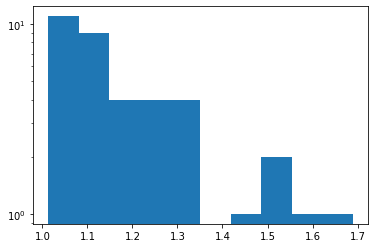

In [134]:
plt.hist(np.log10(event_svec_S))
plt.yscale('log')
plt.show()

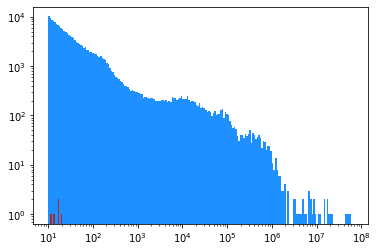

In [136]:
nbins=200
hist, bins = np.histogram(ssvec, bins=nbins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(ssvec, color=hit_color, bins=logbins, label='S-band hits')
hist, bins = np.histogram(event_svec_S, bins=nbins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(event_svec_S, color=event_color, bins=logbins, label='S-band events')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [8]:
print('/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/20867_GJ702B_Rcvr4_6_splic_dat_files.lst')

/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/20867_GJ702B_Rcvr4_6_splic_dat_files.lst


In [9]:
h5_list = ['/datag/pipeline/AGBT17B_999_21/collate2/spliced_blc00010203040506o7o0111213141516o0212223242526o7o031323334353637_guppi_58000_09701_GJ702B_0057.gpuspec.0000.h5',
'/datag/pipeline/AGBT17B_999_21/collate2/spliced_blc00010203040506o7o0111213141516o0212223242526o7o031323334353637_guppi_58000_10040_HIP87790_0058.gpuspec.0000.h5',
'/datag/pipeline/AGBT17B_999_21/collate2/spliced_blc00010203040506o7o0111213141516o0212223242526o7o031323334353637_guppi_58000_10378_GJ702B_0059.gpuspec.0000.h5',
'/datag/pipeline/AGBT17B_999_21/collate2/spliced_blc00010203040506o7o0111213141516o0212223242526o7o031323334353637_guppi_58000_10715_HIP87860_0060.gpuspec.0000.h5',
'/datag/pipeline/AGBT17B_999_21/collate2/spliced_blc00010203040506o7o0111213141516o0212223242526o7o031323334353637_guppi_58000_11052_GJ702B_0061.gpuspec.0000.h5',
'/datag/pipeline/AGBT17B_999_21/collate2/spliced_blc00010203040506o7o0111213141516o0212223242526o7o031323334353637_guppi_58000_11389_HIP87901_0062.gpuspec.0000.h5']

In [ ]:
from turbo_seti.find_event import plot_event

centerfreq = 4174.715223
source_list = ['GJ702B',
               'HIP87790',
               'GJ702B',
               'HIP87860',
               'GJ702B',
               'HIP87901']

plot_event.make_waterfall_plots(fil_file_list = h5_list, 
                                        on_source_name='GJ702B',
                                        f_start=centerfreq-0.00025,
                                        f_stop=centerfreq+0.00025,
                                        drift_rate=0.041,
                                        f_mid=centerfreq,
                                        filter_level=3,
                                        source_name_list=source_list,
                                        offset=0.0001,
                                        plot_dir='/datax/scratch/benjb/bl_nearby_stars/seticore_output/within_5.1_pc/custom_pngs/') 

In [14]:
fb = bl.Waterfall('/datag/pipeline/AGBT23B_999_31/blc06_blp06/blc06_guppi_60331_81094_HIP649_0130.rawspec.0000.h5')
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :                7313.96484375 MHz
            foff :      -2.7939677238464355e-06 MHz
           ibeam :                                1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                         67108864
            nfpc :                          1048576
            nifs :                                1
     rawdatafile : guppi_60331_81094_HIP649_0130.0000.raw
     source_name :                           HIP649
         src_dej :                      -7:33:02.52
         src_raj :                       0:08:01.68
    telescope_id :                                6
           tsamp :               18.253611007999982
   tstart (ISOT) :          2024-01-22